# Car Price Prediction with Machine Learning

### Import Libraries

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

###  Load the Dataset

In [51]:

# Load the dataset
file_path = r"C:/Users/user/OneDrive/Desktop/umrais/CodeAlpha/Car Price Prediction with machine learning/car data.csv"
car_data = pd.read_csv(file_path)

### Display the first five rows of the dataset

In [52]:

print("Dataset Preview:")
print(car_data.head())

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


### Understand the Data

In [53]:

print("\nDataset Info:")
print(car_data.info())

print("\nSummary Statistics:")
print(car_data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Summary Statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min 

### Check for missing values

In [54]:

print("\nMissing Values in Each Column:")
print(car_data.isnull().sum())


Missing Values in Each Column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


### Exploratory Data Analysis (EDA)

#### Plotting distribution of car selling prices

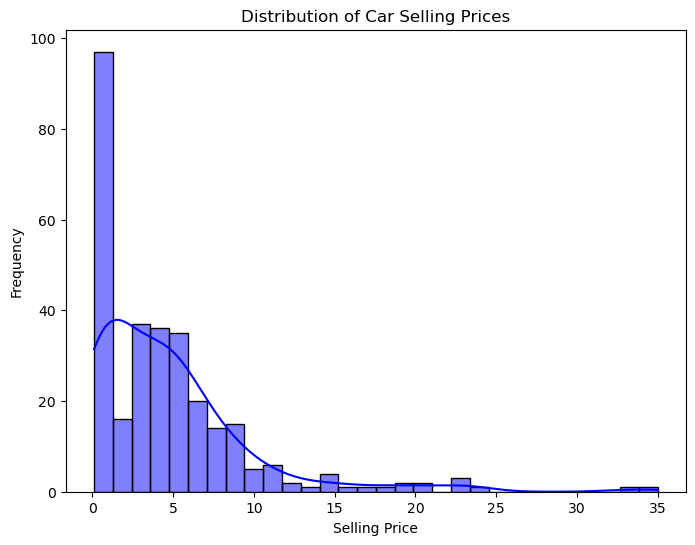

In [55]:


plt.figure(figsize=(8, 6))
sns.histplot(car_data['Selling_Price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Car Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


##### Plotting distribution of car selling prices
This plot displays the distribution of car selling prices. The histogram shows the frequency of cars within different price ranges, and the KDE curve highlights the overall trend. Most cars have a selling price in the lower range, indicating a skewed distribution.

Compare Selling Price with Other Variables:

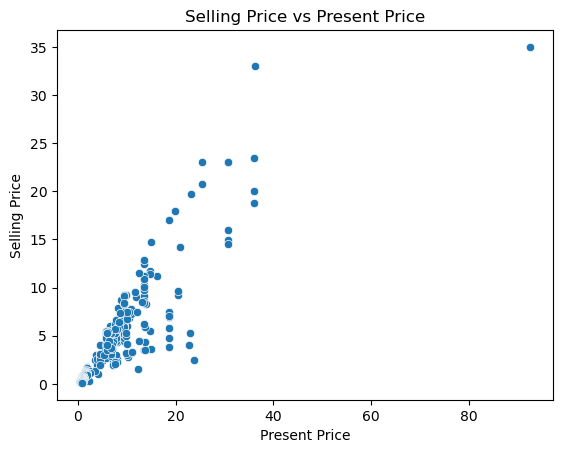

In [56]:
sns.scatterplot(x=car_data['Present_Price'], y=car_data['Selling_Price'])
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()


Group by Fuel Type or Transmission

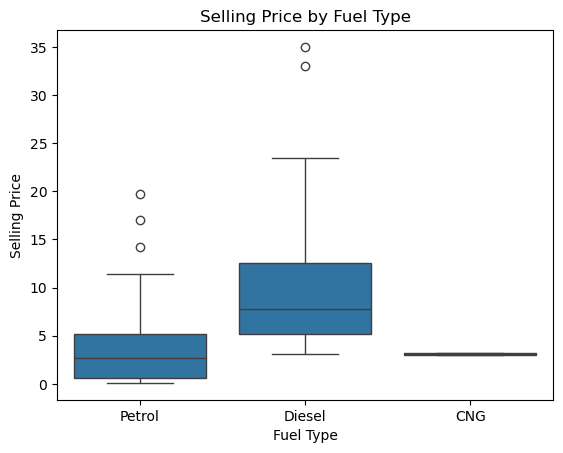

In [57]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()


### Pairplot for visualizing relationships

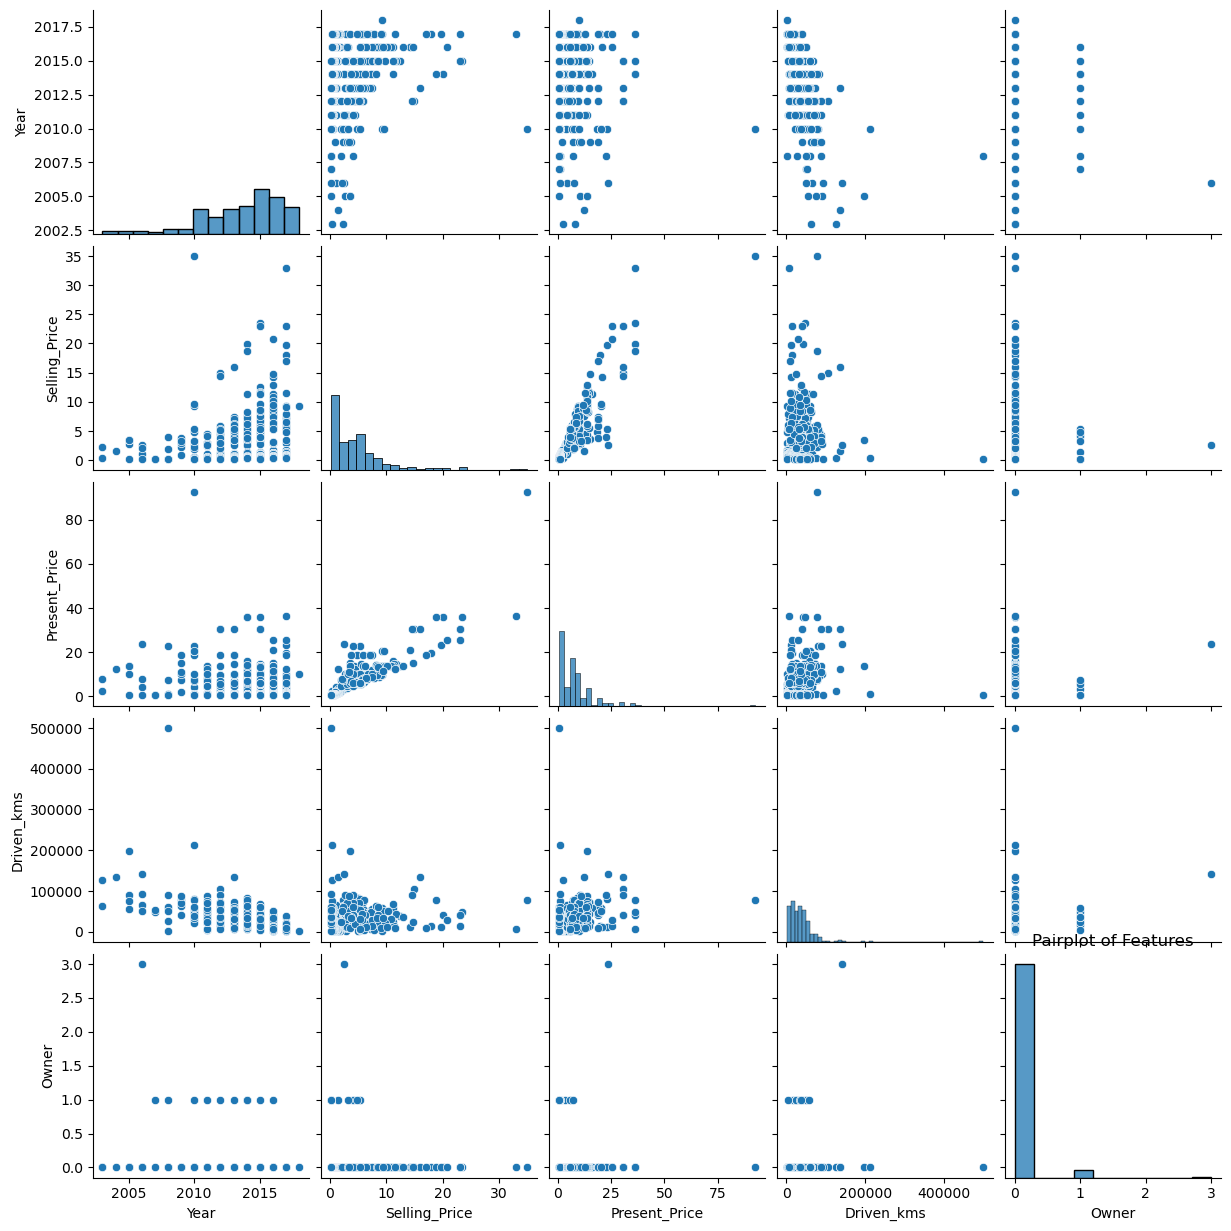

In [58]:

sns.pairplot(car_data)
plt.title("Pairplot of Features")
plt.show()

##### Filter only numeric columns

In [59]:
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])

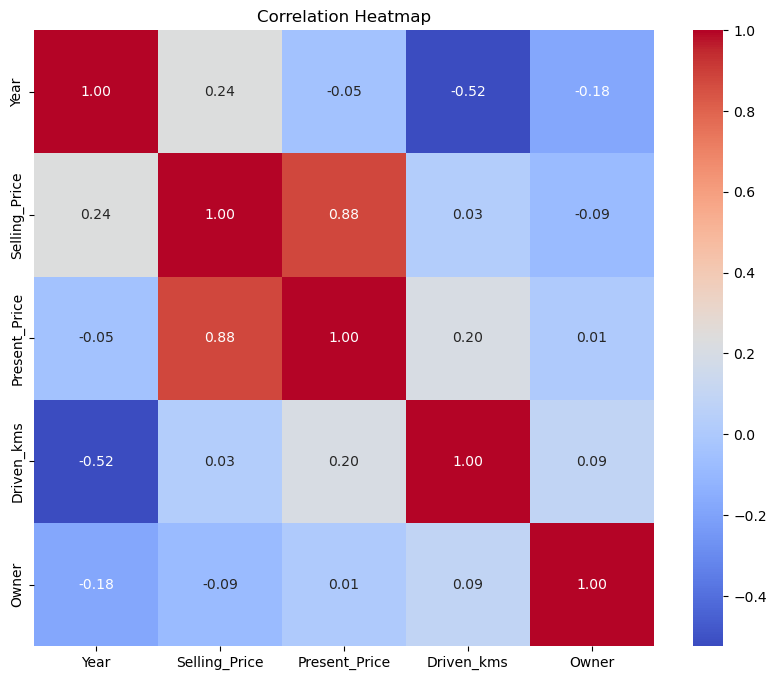

In [ ]:
#  Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### correlation heatmap
The heatmap displays correlations between numeric features. The color gradient indicates the strength of relationships, with red showing strong positive correlations and blue showing strong negative correlations. For example, Present_Price and Selling_Price likely have a strong positive correlation, meaning higher-present prices lead to higher-selling prices.

### Preprocessing the Data

##### Handling categorical variables

In [61]:


print("\nUnique values in categorical columns :")
for col in car_data.columns:
    if car_data[col].dtype == "object":
        print(f"{col}: {car_data[col].nunique()} unique values")



Unique values in categorical columns :
Car_Name: 98 unique values
Fuel_Type: 3 unique values
Selling_type: 2 unique values
Transmission: 2 unique values


#### Converting categorical variables to numerical values

In [62]:

car_data = pd.get_dummies(car_data, drop_first=True)

#### Separating features and target variable

In [63]:

X = car_data.drop("Selling_Price", axis=1)
y = car_data["Selling_Price"]


### Splitting the Data into Training and Testing Sets

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training and Evaluation

#### Linear Regression Model

In [65]:


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### Predictions using Linear Regression

In [66]:

y_pred_lr = lr_model.predict(X_test)

#### Evaluation of Linear Regression

In [67]:

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared Score: {r2_lr:.2f}")


Linear Regression Model Performance:
Mean Squared Error: 9.22
R-squared Score: 0.60


#### Random Forest Regressor

In [ ]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Predictions using Random Forest

In [69]:

y_pred_rf = rf_model.predict(X_test)

#### Evaluation of Random Forest Regressor

In [ ]:

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared Score: {r2_rf:.2f}")


Random Forest Regressor Performance:
Mean Squared Error: 0.75
R-squared Score: 0.97


### Visualization of Results

####  Actual vs Predicted (Random Forest)

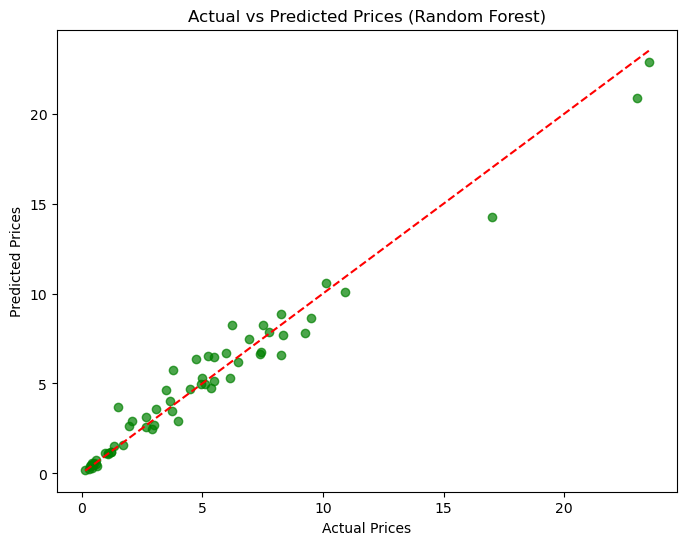

In [ ]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.show()

##### Actual vs Predicted Prices (Random Forest)
This scatter plot compares the actual car prices (y_test) with the predicted prices (y_pred_rf) from the Random Forest model. Each green dot represents a data point, where the x-axis shows the actual prices, and the y-axis shows the predicted prices. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values.The closer the points are to the red dashed line, the better the model's predictions.

#### Feature Importance Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_2828\2297186045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


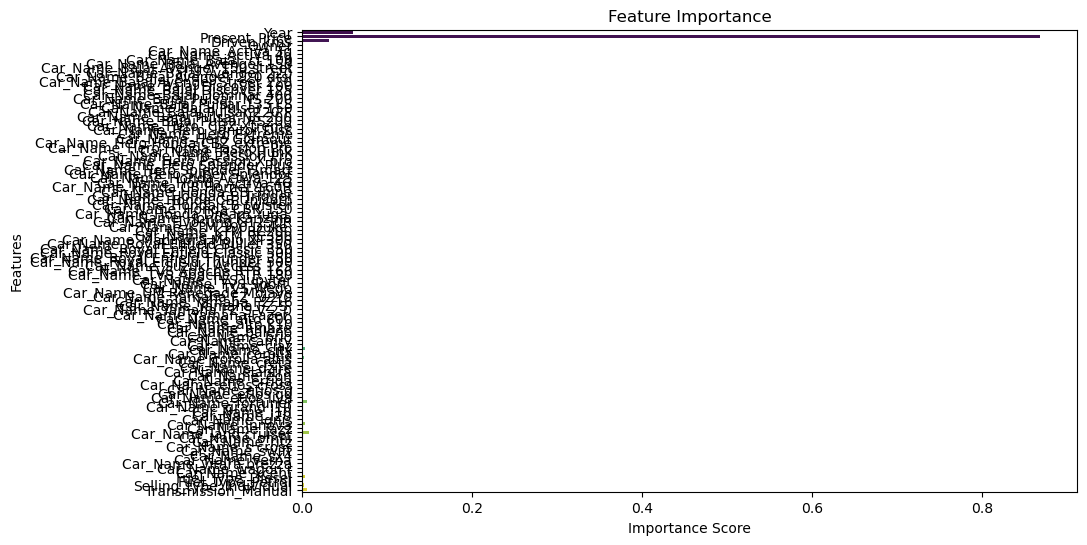

In [ ]:

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

##### Feature Importance Analysis
This bar plot highlights the importance of each feature in predicting the target variable, based on the Random Forest model. The Importance Score indicates how much each feature contributes to the model's decisions. Features with higher scores, such as Present_Price or Year, have a greater influence on predicting Selling_Price, while others like Owner or Fuel_Type may have less impact. This helps identify key factors affecting car prices.

#### Save the Final Model

In [ ]:

import joblib
joblib.dump(rf_model, "car_price_prediction_model.pkl")

print("\nModel training and evaluation complete. All results and visualizations are displayed!")


Model training and evaluation complete. All results and visualizations are displayed!
